# Investigación corta 2 - Aprendizaje Supervizado

## 1. Introducción

Machine Learning o Aprendizaje Automático es una rama de la Inteligencia Artificial que implementa algoritmos que permiten a un programa o sistema aprender por su cuenta y de esta forma poder resolver problemas por sí mismo, en el caso más simple, sería capaz de responder con certeza a preguntas determinadas. Existen dos modalidades para los algoritmos de esta rama: aprendizaje supervisado y no supervisado.

Los algoritmos de aprendizaje supervizados tienen una fase de entrenamiento en la que recibe una serie de features y labels de un set de datos. Los features corresponden a todos los datos de los que deberá aprender para poder calcular los labels, en la fase de entrenamiento se ingresan ambos componentes como entrada y el algoritmo buscará la mejor generalización para posteriormente poder deducir un label por sí sólo ante la entrada de una combinación diferente de features. 

En este documento utilizarán diferentes algoritmos de aprendizaje automático supervizados para poder analizar sus resultados ante un set de datos. Inicialmente se empezará escogiendo un set de datos no trivial y el preprocesamiento del mismo, es decir, eliminar aquellos valores del set de datos que no serán de gran interés o relevancia, así como aquelos features que no sean importantes para el algoritmo de aprendizaje. 

Posteriormente se ejecutarán 6 algoritmos de aprendizaje supervizado sobre el set de datos escogido y se analizarán los resultados obtenidos. Para esto se variarán los hiperparámetros que cada uno de los algoritmos de aprendizaje supervizado posean, de forma que se buscará la combinación que otorga el mejor score. Hay una sección en este documento para cada uno de los 6 algoritmos escogidos, en esta sección no sólo se muestran los resultados conforme se modifican los hiperparámetros, sino que también se realiza un análisis tanto del algoritmo como de los resultados obtenidos, basándose en las bases del algoritmo y la naturaleza de los datos escogidos. 

Entre los 6 algoritmos escogidos tenemos 2 basados en regresión lineal, que son de los modelos más simplistas cuando se trata de aprendizaje supervizado; así como 3 basados en árboles de desiciones. Entre estos algoritmos también tenemos 2 de tipo ensamblaje o **ensamble**: el Random Forest y el Gradient Boosting. Los algoritmos de tipo ensamble son aquellos que combinan diferentes algoritmos de aprendizaje con el fin de obtener una mejor generalización. Dicha combinación puede hacerse de dos maneras: averaging o boosting. El Random Forest realiza la combinación por averaging ya que toma la salida de todos los árboles creados y la promedia para generar el resultado final. Por su parte, el Gradient Boosting utiliza la combinación por medio de boosting, es decir, los algoritmos se aplican secuencialmente y cada uno aprende de los errores del anterior. 

## 2. Dataset Escogido

Inicialmente se importan las bibliotecas que se van a utilizar para el preprocesado del set de datos.

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts

El set de datos escogido contiene varios parámetros que son considerados importantes para la aplicación a Programas de Maestría, a partir de los cuales es posible obtener una probabilidad de ser admitido en el programa. 

In [234]:
df_Admission = pd.read_csv("Datasets/Admission.csv")
df_Admission.shape

(500, 9)

El set de datos escogidos lista los parámetros de 500 diferentes aplicantes y la probabilidad de admisión de los mismos. 

In [235]:
list(df_Admission.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

Entre los features que se consideran importantes para este set de datos tenemos:
* GRE: Calificación entre cero y 340.
* TOEFL: Califiación entre 0 y 120.
* Rating de la universidad: de 1 a 5.
* Declaración de Propósito (SOP): Calificación del 1 al 5 según que tanta validez tenga.
* Carta de Recomendación (LOR): calificación del 1 al 5 según que tanta validez tenga.
* Promedio del pregrado (CGPA): Nota del 0 al 10.
* Experiencia en Investigación: un valor binario que indica si tiene experiencia (1) o no (0).

Entre los features anteriores se pueden eliminar aquellos que no tengan gran relevancia para un modelo predictivo, para ello podemos analizar la features de estos parámetros con la probabilidad de admisión.

In [236]:
list(df_Admission.columns)
df_Admission.corr()["Chance of Admit "]

Serial No.           0.008505
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

Para esta investigación se van a tomar aquellos features tengan una correlación major a 0.65.

In [237]:
cols_to_use = [
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'CGPA',
 'Chance of Admit ']

Reducimos nuestro set de datos a únicamente las columnas de interés.

In [238]:
df_Admission = df_Admission[cols_to_use]
df_Admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Chance of Admit
0,337,118,4,4.5,9.65,0.92
1,324,107,4,4.0,8.87,0.76
2,316,104,3,3.0,8.00,0.72
3,322,110,3,3.5,8.67,0.80
4,314,103,2,2.0,8.21,0.65


Dividimos nuestro set de datos entre features (x) y labels (y).

In [239]:
Features = df_Admission[cols_to_use[:-1]]
Labels = df_Admission[cols_to_use[-1]]
Features.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA
0,337,118,4,4.5,9.65
1,324,107,4,4.0,8.87
2,316,104,3,3.0,8.00
3,322,110,3,3.5,8.67
4,314,103,2,2.0,8.21


In [240]:
Labels.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

Por último, dividimos nuestro set de datos en conjuntos de entrenamiento y de prueba. 

In [241]:
x_train, x_test, y_train, y_test = tts(Features,Labels, random_state=2, shuffle = True)

## 3. Regresión Lineal


Por medio de la clase LinearRegression de sklearn podemos crear un modelo basado en Regresión Lineal, este modelo buscará tomar todos los atributos o features y asociarlos a la salida o labels por medio de una combinación lineal de estos. 

En primera instancia importamos la clase:

In [189]:
from sklearn.linear_model import LinearRegression

Creamos un modelo y lo entrenamos con los datos de entramiento.

In [304]:
LR_Model = LinearRegression()
LR_Model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Con los datos de prueba obtenemos el score de prueba del modelo

In [305]:
LR_Model.score(x_test,y_test)

0.7905049371127519

De igual forma podemos obtener el score de entrenamiento del modelo

In [306]:
LR_Model.score(x_train, y_train)

0.8163823514682675

###  Análisis del Algoritmo

El modelo de regresión lineal es quizás el más simple de todos los algoritmos ya que no posee hiperparámetros que permitan al usuario controlar su manipulamiento. 

Este tipo de modelo generaliza de mejor manera aquellos set de datos que presentan un comportamiento lineal con respecto a la salida. En el caso de nuestro set de datos, por la naturaleza de los mismos, el modelo se encuentra realmente balanceado, con un score de prueba de 0.791 y un score de entrenamiento de 0.816.

## 4. Least-angle regression (LARS)

LARS es un algoritmo de regresión lineal especializado para set de datos con gran cantidad de features, busca encontrar aquellos features que tengan mayor correlación con cada una de las salidas y la regresión lineal a partir de ellos, ignorando el resto de features. 

En primera instancia importamos la clase:

In [350]:
from sklearn.linear_model import Lars

Creamos un modelo y lo entrenamos con los datos de entramiento.

In [354]:
Lars_Model = Lars()
Lars_Model.fit(x_train, y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, positive=False, precompute='auto',
     verbose=False)

Con los datos de prueba obtenemos el score de prueba del modelo

In [355]:
Lars_Model.score(x_test,y_test)

0.7905049371127518

De igual forma podemos obtener el score de entrenamiento del modelo

In [356]:
Lars_Model.score(x_train, y_train)

0.8163823514682674

Iteramos n_nonzero_coefs entre 1 y 5 para escalar el algoritmo a la cantidad de features que posee nuestro set de datos. 

In [358]:
nonzero_coefs = range(1,6,1)

for coef in nonzero_coefs:
    Lars_Model = Lars(n_nonzero_coefs = coef)
    Lars_Model.fit(x_train, y_train)
    score_test = Lars_Model.score(x_test,y_test)
    score_train = Lars_Model.score(x_train,y_train)
    print("n_nonzero_coefs = " + str(coef))
    print("\t Testing Score = " + str(score_test))
    print("\t Training Score = " + str(score_train))

n_nonzero_coefs = 1
	 Testing Score = 0.5474675660055983
	 Training Score = 0.5402175429664211
n_nonzero_coefs = 2
	 Testing Score = 0.6659798178217398
	 Training Score = 0.6596915948662299
n_nonzero_coefs = 3
	 Testing Score = 0.7658530170442189
	 Training Score = 0.7719203890180117
n_nonzero_coefs = 4
	 Testing Score = 0.7789684059776261
	 Training Score = 0.7889612264482683
n_nonzero_coefs = 5
	 Testing Score = 0.7905049371127518
	 Training Score = 0.8163823514682674


### Análisis del Algoritmo

Si bien este algoritmo busca obtener una mejor generalización sobre aquellos set de datos que posean gran cantidad de features, se incluyó en este documento para poder analizar su comportamiento ante set de datos con pequeños features. 

El hiperparámetro n_nonzero_coefs le indica al algoritmo cuántos de los features debe conservar, haciendo al coeficiente de todos los demás en la regresión lineal igual a cero. Por defecto este valor es de 500, y como en nuestro set de datos sólo tenemos 5 features, entonces los 5 se tomarán en cuenta, esto ocasiona que el comportamiento de este algoritmo en este caso sea exactamente igual al de la regresión lineal.

Podemos disminuir este valor, para que sólo se tomen alguno de los features en lugar de todos. Por esto se realizó la iteración del hiperparámetro n_nonzero_coefs entre 1 y 5. Los scores obtenidos demuestran para set de datos con muy pocos features LARS obtiene los mejores resultados cuando todos se toman en cuenta, es decir, cuando se comporta como un algoritmo de regresión lineal. 

## 5. kNN

kNN o k-ésino vecino más cercano se basa en encontrar un número predeterminado de vecinos del set de entrenamiento que estén cercanos al valor de testing y de esta forma poder predecir la salida.

Seguidamente importamos la clase KNeighborsRegressor de la biblioteca sklearn

In [193]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

Creamos un modelo y lo entrenamos con los datos de entramiento.

In [194]:
kNN_Model = KNeighborsRegressor(n_neighbors=5)
kNN_Model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Con los datos de prueba obtenemos el score de prueba del modelo

In [195]:
kNN_Model.score(x_test,y_test)

0.6630119884064687

De igual forma podemos obtener el score de entrenamiento del modelo


In [196]:
kNN_Model.score(x_train,y_train)

0.8188007024710212

Los hiperparámetros establecidos para el modelo fueron los determinados por defecto por KNeighborsRegressor. Seguidamente iteraremos con diferentes combinaciones de los hiperparámetros para analizar con cuál se obtiene el mejor score. 

En primera instancia variaremos el valor de los k vecinos a corroborar para los dos tipos de pesos que posee la clase. 

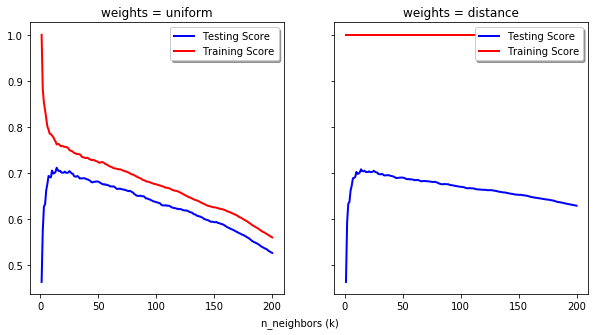

In [197]:
ks = range(1,201,1)
ws = ["uniform", "distance"]

fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches(10,5)
fig.text(0.5, 0.04, "n_neighbors (k)", ha='center')

for count_w in range(len(ws)):
    w = ws[count_w]
    ax = axs[count_w]
    
    scores = []
    scores2 = []
    for neighbors in ks:
        kNN_Model = KNeighborsRegressor(n_neighbors=neighbors, weights = w)
        kNN_Model.fit(x_train, y_train)
        score = kNN_Model.score(x_test,y_test)
        score2 = kNN_Model.score(x_train,y_train)
        scores += [score]
        scores2 += [score2]

    ax.plot(ks, scores, color='blue', linewidth=2, label="Testing Score")
    ax.plot(ks, scores2, color='red', linewidth=2, label="Training Score")
    ax.legend(loc='upper right', shadow=True)
    ax.set_title("weights = " + str(w))


Otro hiperparámetro relevante es el algoritmo que se utiliza para calcular al vecino más cercano, KNeighborsRegressor permite usar 4 diferentes algoritmos, a continuación se hace variar k para cada uno de los 4 posibles valores.

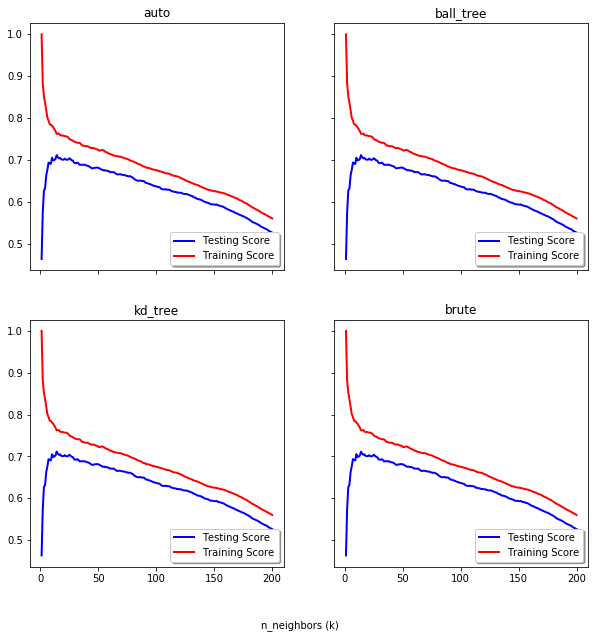

In [198]:
algorithms = ["auto", "ball_tree", "kd_tree", "brute"]
ks = range(1,201,1)

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
fig.set_size_inches(10,10)
fig.text(0.5, 0.04, "n_neighbors (k)", ha='center')
for count in range(len(algorithms)):
    algrthm = algorithms[count]
    ax = axs[(count)//2,(count)%2]
    scores = []
    scores2 = []
    for neighbors in ks:
        kNN_Model = KNeighborsRegressor(n_neighbors=neighbors, algorithm = algrthm)
        kNN_Model.fit(x_train, y_train)
        score = kNN_Model.score(x_test,y_test)
        score2 = kNN_Model.score(x_train,y_train)
        scores += [score]
        scores2 += [score2]

    ax.plot(ks, scores, color='blue', linewidth=2, label="Testing Score")
    ax.plot(ks, scores2, color='red', linewidth=2, label="Training Score")
    ax.set_title(algrthm)
    ax.legend(loc='lower right', shadow=True)


###  Análisis del Algoritmo

El hiperparámetro de más relevancia en el modelo kNN es el valor k, o n_neighbors, el cuál indica la cantidad de vecinos que el algoritmo a va tomar para entrenarse, y de la misma manera, realizar sus predicciones. Es por esto que en esta sección se tomó este hiperparámetro como referencia para realizar las gráficas. 

El hiperparámetro weights o peso nos indica que tan importante es cada punto para el algoritmo, el valor por defecto es un peso uniforme, el cuál indica que todos los valores tienen la misma importancia. Por otro lado, se puede ajustar este hiperparámetro para asignar los pesos por distancia, de forma que aquellos más alejados del resto de los valores van a tener menor peso que el resto. 

Al graficar el score con respeto a k para los dos pesos posibles notamos que con el peso por distancia se obtiene un overfitting, ya que el score de entrenamiento siempre es cercano a uno, pero el score de prueba más alto está alrededor de 0.7. Por otro lado, cuando los pesos son uniformes podemos observar que hay un overfitting para k bajos y un underfitting para k altos; pero se balancea con un k entre 5 y 10.

El siguiente hiperparámetro analizado es algorithm, este nos permite escoger cuál algoritmo va a ser usado para escoger el vecino más cercano, sin embargo, al graficar el score con respecto a k pero variando los algoritmos obtenemos los mismos resultados; de forma que sin importar el algoritmo usado para nuestro set de datos en particular el modelo kNN se comportará de la misma manera. 

## 6. Decision Tree

El objetivo del algoritmo de aprendizaje supervisado conocido como árbol de decisiones no es buscar parámetros para interrelacionar los diferentes features, sino poder predecir el valor de salida a partir de una serie de reglas de decisiones que aprende por medio del set de entrenamiento.

Seguidamente importamos la clase DecisionTreeRegressor de la biblioteca sklearn

In [199]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

Creamos un modelo y lo entrenamos con los datos de entramiento.

In [200]:
DTR_Model = DecisionTreeRegressor(max_depth = 3, max_features=1)
DTR_Model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=1,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con los datos de prueba obtenemos el score de prueba del modelo

In [201]:
DTR_Model.score(x_test,y_test)

0.6520081896261696

De igual forma podemos obtener el score de entrenamiento del modelo


In [202]:
DTR_Model.score(x_train,y_train)

0.6901708247073294

Los hiperparámetros establecidos para el modelo fueron los determinados por defecto por DecisionTreeRegressor. Seguidamente iteraremos con diferentes combinaciones de los hiperparámetros para analizar con cuál se obtiene el mejor score.

En primera instancia variaremos el valor de la máxima profundidad del árbol.

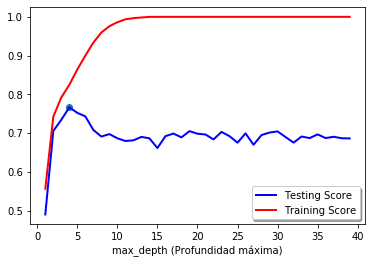

In [221]:
depths = range(1,40,1)

scores = []
scores2 = []
for d in depths:
    DTR_Model = DecisionTreeRegressor(max_depth=d)
    DTR_Model.fit(x_train, y_train)
    score = DTR_Model.score(x_test,y_test)
    score2 = DTR_Model.score(x_train,y_train)
    scores += [score]
    scores2 += [score2]

plt.plot(depths, scores, color='blue', linewidth=2, label = "Testing Score")
plt.plot(depths, scores2, color='red', linewidth=2, label = "Training Score")
plt.legend(loc='lower right', shadow=True)

max_score = max(scores)
parm_max_score = scores.index(max_score)
plt.scatter([parm_max_score+1], [max_score])
plt.xlabel("max_depth (Profundidad máxima)")
plt.show()


Seguidamente variaremos el hiperparámetro que indica determina la mayor cantidad de nodos hoja posibles. 

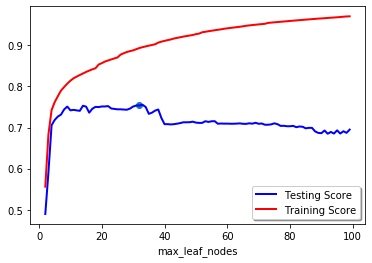

In [222]:
nodes = range(2,100,1)

scores = []
scores2 = []
for n in nodes:
    DTR_Model = DecisionTreeRegressor(max_leaf_nodes = n)
    DTR_Model.fit(x_train, y_train)
    score = DTR_Model.score(x_test, y_test)
    score2 = DTR_Model.score(x_train, y_train)
    scores += [score]
    scores2 += [score2]

plt.plot(nodes, scores, color = 'blue', linewidth = 2, label = "Testing Score")
plt.plot(nodes, scores2, color = 'red', linewidth = 2, label = "Training Score")
plt.legend(loc='lower right', shadow=True)

max_score = max(scores)
parm_max_score = scores.index(max_score)
plt.scatter([parm_max_score + 1], [max_score])
plt.xlabel("max_leaf_nodes")
plt.show()


Otro hiperparámetro que se considera importante es la cantitad de diferentes features que se van a considerar en un nodo a la hora crear una regla de desición. Como se tienen 5 features, entonces iteraremos variando la profundidad máxima usando de 1 a 5 features. 

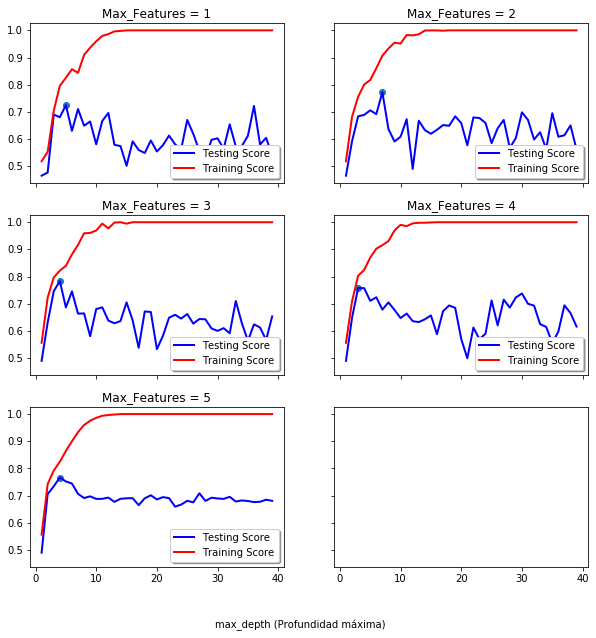

In [210]:
depths = range(1,40,1)
num_features = range(1,6,1)

fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
fig.set_size_inches(10,10)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count in num_features:
    ax = axs[(count-1)//2,(count-1)%2]
    scores = []
    scores2 = []
    for d in depths:
        DTR_Model = DecisionTreeRegressor(max_depth=d, max_features = count)
        DTR_Model.fit(x_train, y_train)
        score = DTR_Model.score(x_test,y_test)
        score2 = DTR_Model.score(x_train,y_train)
        scores += [score]
        scores2 += [score2]

    ax.plot(depths, scores, color='blue', linewidth=2, label = "Testing Score")
    ax.plot(depths, scores2, color='red', linewidth=2, label = "Training Score")
    ax.legend(loc='lower right', shadow=True)
    ax.set_title("Max_Features = " + str(count))
    max_score = max(scores)
    parm_max_score = scores.index(max_score)
    ax.scatter([parm_max_score+1], [max_score])

### Análisis del Algoritmo

Para un árbol de decisiones hay dos hiperparámetros que tienen mayor importancia, se tratan de la profundidad del árbol (max_depth) y de la cantidad máxima de nodos hoja posible (max_leaf_nodes). Estos son los más importantes porque son los que limitan el crecimiento del árbol como tal e indican el final del algoritmo.

Al graficar el score contra max_depth y max_leaf_nodes obtenemos el mismo comportamiento: para valores muy bajos tanto de max_depth como de max_leaf_nodes se cae en underfitting, porque el modelo no logra generalizar adecuadamente el set de datos, y por otro lado, para valores muy altos se obtiene overfitting, ya que el modelo se especializa en trabajar únicamente con los datos de entrenamiento y no en generalizar el comportamiento de estos en general. Para nuestro set de datos en particular, el árbol encuentra un buen balance con una profundidad máxima de 4 y con un máximo de entre 10 y 15 nodos hoja. 

Se analizó también un tercer hiperparámetro que sería max_features, este nos indica cuál es la mayor cantidad de features que se puede tomar en cuenta en cada nodo para crear una regla y posteriormente tomar un decisión. Para nuestro set de datos tenemos únicamente 5 features, por lo que se grafica el score contra max_depth considerando de 1 a 5 features. Al analizar estas gráficas podemos ver que el comportamiento del score con respeto a max_depth no varía mucho a grandes rasgos, ya que siempre tendremos underfitting para valores bajos y overfitting para valores altos. Sin embargo, cabe resaltar que para 5 features el score se estabiliza para valores más altos de max_depth, esto nos indica que ningún feature es más relevante que otro en nuestro set de datos y que todos tienen que ser tomados en cuenta sino el modelo se vuelvo muy impredecible. 

## 7. Random Forest

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

Random Forest es un algoritmo de aprendizaje de tipo ensemble busca predecir las salidas mediante el uso de varios árboles de decisión, estos árboles serán creados con un factor aleatorio para que cada uno represente una serie de desiciones y reglas diferentes. 

Seguidamente importamos la clase RandomForestRegressor de la biblioteca sklearn

In [38]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

Creamos un modelo y lo entrenamos con los datos de entramiento.


In [39]:
RFR_Model = RandomForestRegressor(n_estimators=10)
RFR_Model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Con los datos de prueba obtenemos el score de prueba del modelo

In [40]:
RFR_Model.score(x_test,y_test)

0.7446840769269244

De igual forma podemos obtener el score de entrenamiento del modelo


In [41]:
RFR_Model.score(x_train,y_train)

0.9552603007988527

Los hiperparámetros establecidos para el modelo fueron los determinados por defecto por RandomForestRegressor. Seguidamente podemos iterar con diferentes combinaciones de los hiperparámetros para analizar con cuál se obtiene el mejor score.

En primera instancia variaremos el valor de la máxima profundidad de los árboles.

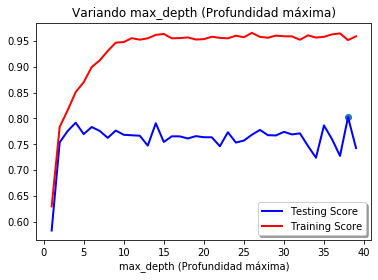

In [62]:
depths = range(1,40,1)

scores = []
scores2 = []
for d in depths:
    RFR_Model = RandomForestRegressor(max_depth=d,n_estimators=10)
    RFR_Model.fit(x_train, y_train)
    score = RFR_Model.score(x_test,y_test)
    score2 = RFR_Model.score(x_train,y_train)
    scores += [score]
    scores2 += [score2]


plt.plot(depths, scores, color='blue', linewidth=2, label = "Testing Score")
plt.plot(depths, scores2, color='red', linewidth=2, label = "Training Score")
plt.legend(loc='lower right', shadow=True)
max_score = max(scores)
parm_max_score = scores.index(max_score)
plt.scatter([parm_max_score+1], [max_score])
plt.title("Variando max_depth (Profundidad máxima)")
plt.xlabel("max_depth (Profundidad máxima)")
plt.show()


Otro hiperparámetro que se considera importante es la cantitad de diferentes features que se van a considerar en un nodo a la hora crear una regla de desición. Como se tienen 5 features, entonces iteraremos variando la profundidad máxima usando de 1 a 5 features. 

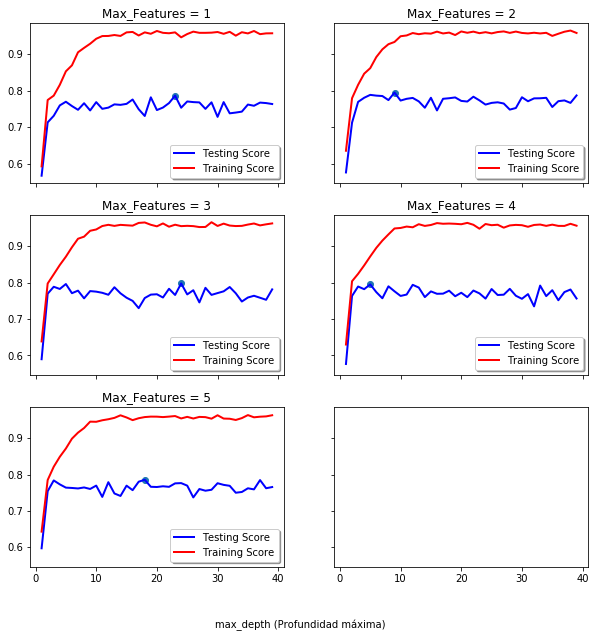

In [63]:
depths = range(1,40,1)

fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
fig.set_size_inches(10,10)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count in range(1,6,1):
    ax = axs[(count-1)//2,(count-1)%2]
    scores = []
    scores2 = []
    for d in depths:
        RFR_Model = RandomForestRegressor(max_depth=d,max_features=count,n_estimators=10)
        RFR_Model.fit(x_train, y_train)
        score = RFR_Model.score(x_test,y_test)
        score2 = RFR_Model.score(x_train,y_train)
        scores += [score]
        scores2 += [score2]


    ax.plot(depths scores, color='blue', linewidth=2, label = "Testing Score")
    ax.plot(depths, scores2, color='red', linewidth=2, label = "Training Score")
    ax.legend(loc='lower right', shadow=True)
    ax.set_title("Max_Features = " + str(count))
    max_score = max(scores)
    parm_max_score = scores.index(max_score)
    ax.scatter([parm_max_score+1], [max_score])

Ya que Random forest corresponde a un conjunto de árboles de decisiones, la clase nos da el hiperparámetro para determinar la cantidad máxima de árboles que queremos incluir en nuestro modelo. A continuación se variará la cantidad de árboles y la cantidad máxima de features. 

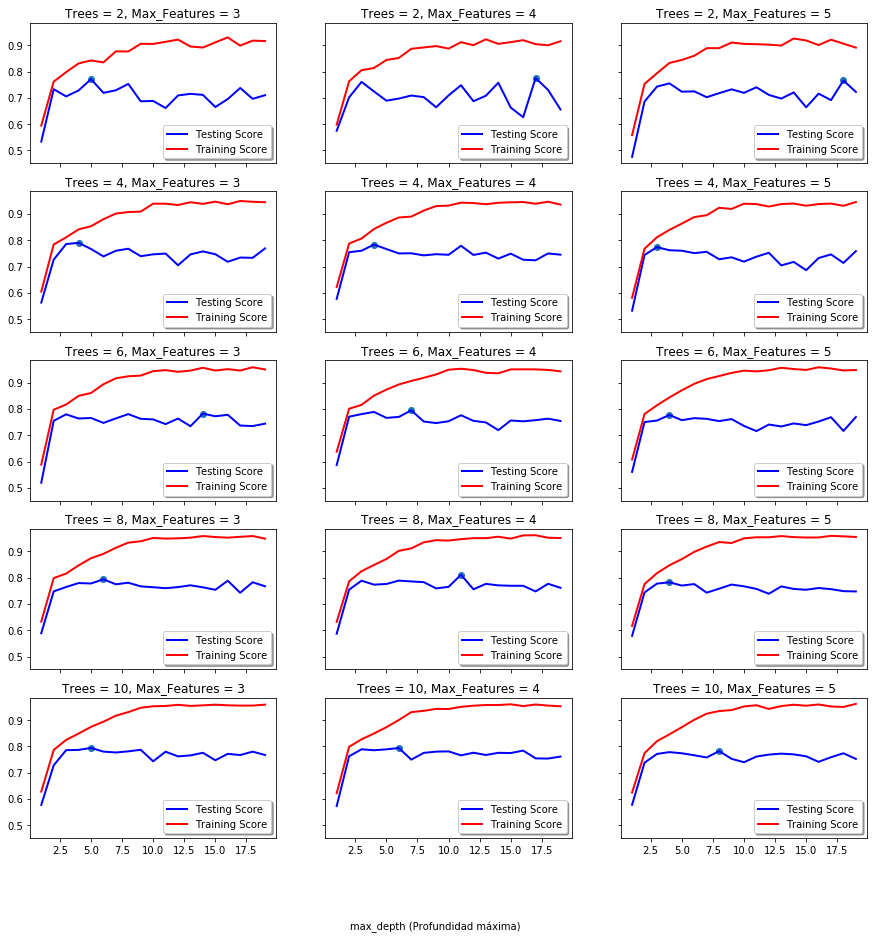

In [67]:
depths = range(1,20,1)

fig, axs = plt.subplots(5,3, sharex=True, sharey=True)
fig.set_size_inches(15,15)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count_trees in range(2,11,2):
    for count_feats in range(3,6,1):
        ax = axs[(count_trees//2-1),(count_feats-3)]
        scores = []
        scores2 = []
        for d in depths:
            RFR_Model = RandomForestRegressor(max_depth=d,max_features=count_feats,n_estimators=count_trees)
            RFR_Model.fit(x_train, y_train)
            score = RFR_Model.score(x_test,y_test)
            score2 = RFR_Model.score(x_train,y_train)
            scores += [score]
            scores2 += [score2]

        ax.plot(depths, scores, color='blue', linewidth=2, label = "Testing Score")
        ax.plot(depths, scores2, color='red', linewidth=2, label = "Training Score")
        ax.legend(loc='lower right', shadow=True)
        ax.set_title("Trees = "+str(count_trees) +", Max_Features = " + str(count_feats))
        max_score = max(scores)
        parm_max_score = scores.index(max_score)
        ax.scatter([parm_max_score+1], [max_score])
        #plt.show()

### Análisis del Algoritmo

Al tratarse Random Forest de un conjunto de árboles de decisiones entonces tenemos los mismos hiperparámetro. Al graficar el score contra max_depth y variando la cantidad de features obtenemos los mismos resultados que cuando tenemos un único árbol de desiciones. Esto se debe a que los modelos basados en árboles de decisiones no son muy buenos para generalizar nuestro set de datos, debido propiamente a la naturaleza del mismo. 

Sin embargo, realizamos una iteración extra en esta sección para analizar el comportamiento del modelo al variar la cantidad de árboles que se incluye en el mismo. Y podemos observar que mientras más alto el número de árboles más se estabiliza el score de prueba para max_depth altos, lo cuál indica que permite generalizar los datos de una mejor manera, sin embargo, no se obtienen valores relativamente más alto con respecto a los obtenidos con el árbol de decisiones. 

## 8.  Gradient Boosting

El algoritmo gradient boosting crea diferentes árboles de regresión pero no los hace de forma independiente, como lo haría el random forest, sino que los crea de manera secuencial de forma que un nuevo árbol aprenda de los errores del anterior antes de ser creado y de esta forma mejorar su rendimiento. Para la creación del nuevo árbol el algoritmo busca optimizar una función de perdida con respecto al anterior árbol creado, de esta forma reducir el error y generalizar mejor los datos. Cabe recalcar que este algoritmo pertenece a la categoría de ensemble, utiliza varios modelos de árboles de regresión.

Seguidamente importamos la clase GradientBoostingRegressor de la biblioteca sklearn

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

Creamos un modelo y lo entrenamos con los datos de entramiento.

In [127]:
GBR_Model = GradientBoostingRegressor(loss = "huber",)
GBR_Model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Con los datos de prueba obtenemos el score de prueba del modelo

In [128]:
GBR_Model.score(x_test, y_test)

0.7882647438214367

De igual forma podemos obtener el score de entrenamiento del modelo.

In [129]:
GBR_Model.score(x_train, y_train)

0.8956945861775674

Los hiperparámetros establecidos para el modelo fueron los determinados por defecto por GradientBoostingRegressor. Seguidamente podemos iterar con diferentes combinaciones de los hiperparámetros para analizar con cuál se obtiene el mejor score.

En primera instancia variaremos el valor de la máxima profundidad de los árboles.

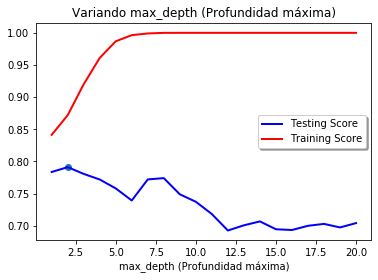

In [225]:
depths = range(1,21,1)

scores = []
scores2 = []
for d in depths:
    GBR_Model = GradientBoostingRegressor(max_depth=d)
    GBR_Model.fit(x_train, y_train)
    score = GBR_Model.score(x_test,y_test)
    score2 = GBR_Model.score(x_train,y_train)
    scores += [score]
    scores2 += [score2]


plt.plot(depths, scores, color='blue', linewidth=2, label = "Testing Score")
plt.plot(depths, scores2, color='red', linewidth=2, label = "Training Score")
plt.legend(loc='center right', shadow=True)
max_score = max(scores)
parm_max_score = scores.index(max_score)
plt.scatter([parm_max_score+1], [max_score])
plt.title("Variando max_depth (Profundidad máxima)")
plt.xlabel("max_depth (Profundidad máxima)")
plt.show()

Al igual que en el algoritmo del árbol de decisiones podemos limitar con un hiperparámetro la cantidad de features que se tomarán en cuenta por nodo para tomar una decisión. De esta forma iteramos para obtener el comportamiento obtenido tomando en cuenta de 1 a 5 features diferentes. 

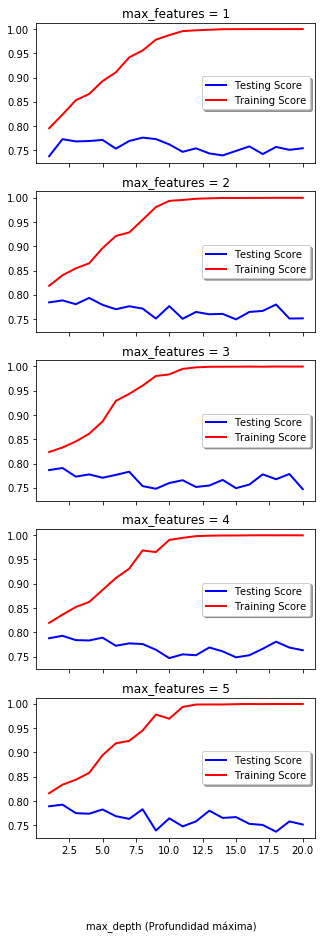

In [226]:
depths = range(1,21,1)

fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(5,15)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count_features in range(1,6,1):
    ax = axs[(count_features-1)]
    scores = []
    scores2 = []
    for d in depths:
        GBR_Model = GradientBoostingRegressor(max_depth=(d), loss = "lad", max_features = count_features)
        GBR_Model.fit(x_train, y_train)
        score = GBR_Model.score(x_test,y_test)
        score2 = GBR_Model.score(x_train,y_train)
        scores += [score]
        scores2 += [score2]

    ax.plot(depths, scores, color='blue', linewidth=2, label="Testing Score")
    ax.plot(depths, scores2, color='red', linewidth=2, label="Training Score")
    ax.set_title("max_features = " + str(count_features))
    ax.legend(loc='center right', shadow=True)

A continuación variaremos la cantidad de árboles que se van a crear (o de estimadores) y la tasa de aprendizaje.

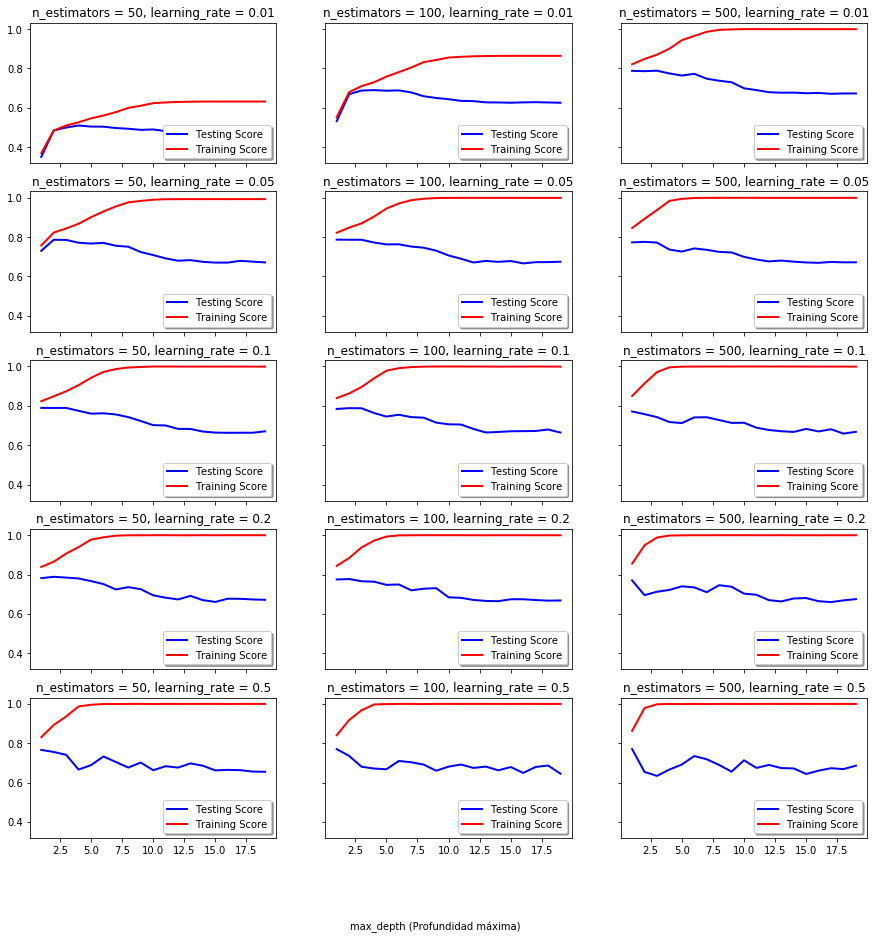

In [156]:
depths = range(1,20,1)
learning_rates = [0.01, 0.05, 0.1, 0.20, 0.5]
estimators = [50, 100, 500]

fig, axs = plt.subplots(len(learning_rates), len(estimators), sharex=True, sharey=True)
fig.set_size_inches(15,15)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count_lr in range(len(learning_rates)):
    lr = learning_rates[count_lr]
    for count_e in range(len(estimators)):
        e = estimators[count_e]
        ax = axs[count_lr,count_e]
        scores = []
        scores2 = []
        for d in depths:
            GBR_Model = GradientBoostingRegressor(max_depth=d, loss = "huber", n_estimators = e, learning_rate = lr)
            GBR_Model.fit(x_train, y_train)
            score = GBR_Model.score(x_test,y_test)
            score2 = GBR_Model.score(x_train,y_train)
            scores += [score]
            scores2 += [score2]

        ax.plot(depths, scores, color='blue', linewidth=2, label="Testing Score")
        ax.plot(depths, scores2, color='red', linewidth=2, label="Training Score")
        ax.set_title("n_estimators = " + str(e) + ", learning_rate = " + str(lr))
        ax.legend(loc='lower right', shadow=True)

Variaremos la función de pérdida que queremos optimizar entre los cuatro posibles valores, así como los posibles criterios que se pueden usar para medir la calidad de cada división en el árbol.  

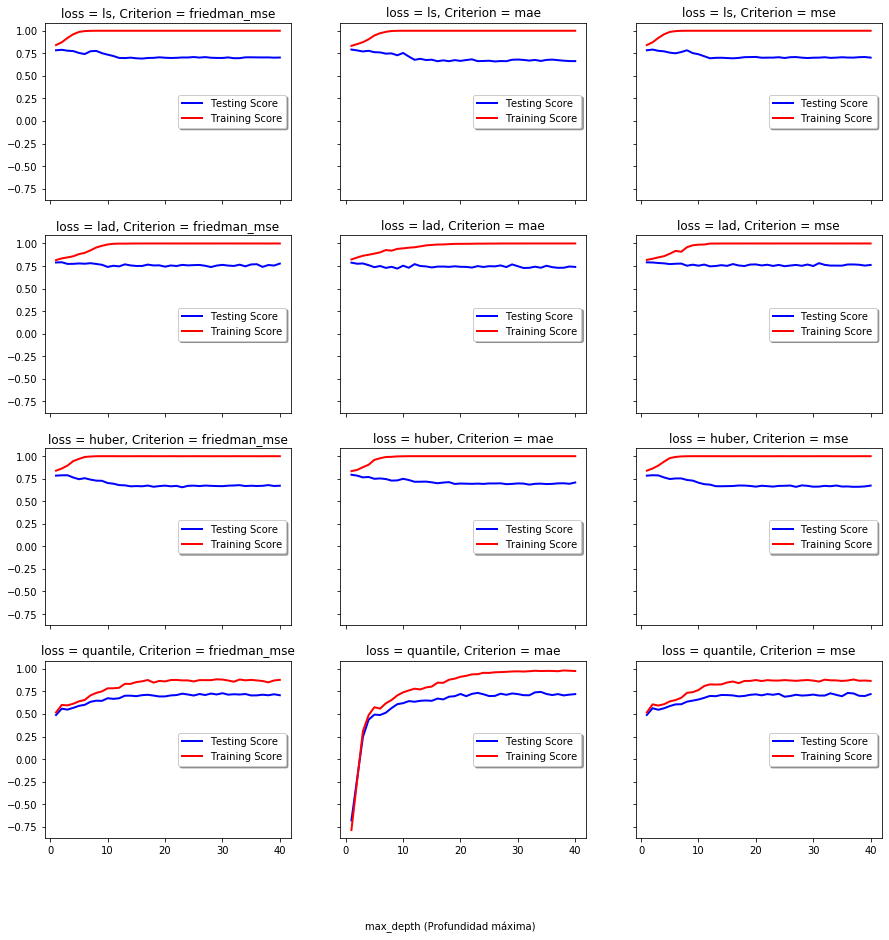

In [228]:
depths = range(1,41,1)
loss_algorithms = ["ls", "lad", "huber", "quantile"]
criterions = ["friedman_mse", "mae", "mse"]

fig, axs = plt.subplots(4,3, sharex=True, sharey=True)
fig.set_size_inches(15,15)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count_criterions in range(len(criterions)):
    criterion1 = criterions[count_criterions]
    for count_algorithms in range(len(loss_algorithms)):
        algrthm = loss_algorithms[count_algorithms]
        ax = axs[count_algorithms,count_criterions]
        scores = []
        scores2 = []
        for d in depths:
            GBR_Model = GradientBoostingRegressor(max_depth=d, loss = algrthm, criterion = criterion1)
            GBR_Model.fit(x_train, y_train)
            score = GBR_Model.score(x_test,y_test)
            score2 = GBR_Model.score(x_train,y_train)
            scores += [score]
            scores2 += [score2]

        ax.plot(depths, scores, color='blue', linewidth=2, label="Testing Score")
        ax.plot(depths, scores2, color='red', linewidth=2, label="Training Score")
        ax.set_title("loss = " + str(algrthm) + ", Criterion = " + str(criterion1))
        ax.legend(loc='center right', shadow=True)

Para dos de las posibles funciones de pérdida que se pueden optimizar se agrega el hiperparámetro alpha, el cuál pude tomar valores entre cero y uno para modificar el comportamiento de estos dos algoritmos. A continuación, obtendremos el comportamiento de estos dos algoritmos ante varios valores de alpha. 

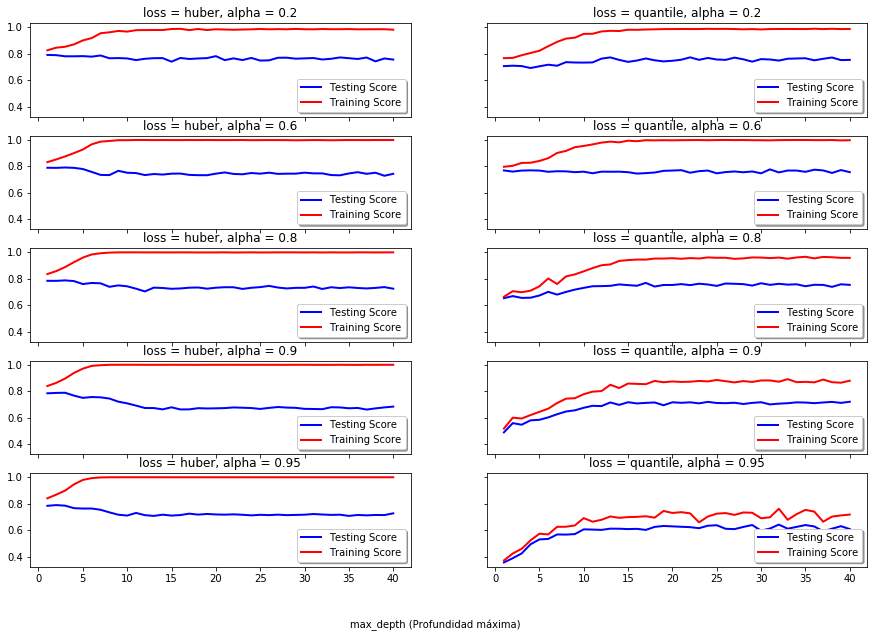

In [229]:
depths = range(1,41,1)
loss_algorithms = ["huber", "quantile"]
alphas = [0.2, 0.6, 0.8, 0.9, 0.95]

fig, axs = plt.subplots(len(alphas), len(loss_algorithms), sharex=True, sharey=True)
fig.set_size_inches(15,10)
fig.text(0.5, 0.04, "max_depth (Profundidad máxima)", ha='center')
for count_a in range(len(alphas)):
    a = alphas[count_a]
    for count_algorithms in range(len(loss_algorithms)):
        algrthm = loss_algorithms[count_algorithms]
        ax = axs[count_a, count_algorithms]
        scores = []
        scores2 = []
        for d in depths:
            GBR_Model = GradientBoostingRegressor(max_depth=d, loss = algrthm, alpha = a)
            GBR_Model.fit(x_train, y_train)
            score = GBR_Model.score(x_test,y_test)
            score2 = GBR_Model.score(x_train,y_train)
            scores += [score]
            scores2 += [score2]

        ax.plot(depths, scores, color='blue', linewidth=2, label="Testing Score")
        ax.plot(depths, scores2, color='red', linewidth=2, label="Training Score")
        ax.set_title("loss = " + str(algrthm) + ", alpha = " + str(a))
        ax.legend(loc='lower right', shadow=True)

###  Análisis del Algoritmo

Este algoritmo al basarse en un conjunto de árboles de regresión posee entre sus hiperparámetros los mismos que el algoritmo de árbol de decisiones. Al analizar el comportamiento del score contra max_depth podemos observar que el comportamiento es bastante similar con respecto a los otros algoritmos basados en árboles, con la excepción de que este algoritmo no produce underfitting, sino que para valores bajos de max_depth se encuentra balanceado; por otro lado, el comportamiento para valores altos de max_depth se mantienen, originando un overfitting.

Al igual que con el árbol de decisiones podemos usar el hiperparámetro max_features para indicar cuántos features queremos que sean considerados por nodo a la hora de tomar decisiones. En este caso, para el algoritmo Gradient Boosting, los scores no varían significativamente según se varía max_features, es decir, para nuestro set de datos este algoritmo se comporta igual sin importar el valor de este hiperparámetro.

Los hiperparámetros n_estimators y learning_rate se analizaron en conjunto, esto porque se encuentran interrelacionados. La tasa de aprendizaje (learning_rate) nos establece qué tan rápido va a aprender el algoritmo de los datos de entrenamiento, por esto, con forma más alto más rápidamente se cae en overfitting conforme max_depth aumento. Lo mismo pasa con n_estimators, ya que este parámetro indica cuántos árboles se van a crear, de forma que mientras más árboles se creen más rápido se caerá en overfitting. 

Los últimos hiperparámetros analizados buscan modificar los algoritmos internos usados dentro del algoritmo Gradient Boost. El hiperparámetro loss establece cuál es la función de pérdida que queremos optimizar, la clase GradientBoostingRegressor dispone de 4 funciones diferentes a optimizar. Por su parte, criterion establece cuál es el criterios a usar para medir la calidad de cada división en el árbol. Al analizar los resultados cuando variamos estos dos hiperparámetros podemos observar que el comportamiento en nuestro set de datos es el mismo sin importar el valor de estos. La únicas gráficas que presentan un comportamiento distinto es cuando loss toma el valor de quantile, sin embargo, el comportamiento de estas gráficas no es mejor que el de las otras, ya que aunque no cae realmente en overfitting de igual manera obtiene bajos scores de prueba. 

Finalmente, analizamos el efecto del hiperparámetro alpha, este hiperparámetro sólo afecta cuando la función de pérdida a optimizar es huber o quantile, sin embargo, al analizar las gráficas podemos observar que para nuestro set de datos el variar este parámetro no genera ningún cambio significativo en el comportamiento del modelo ni en los resultados.